In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Customer_Segmentation.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [7]:
x = df.copy()
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
from sklearn.cluster import DBSCAN

In [9]:
dbscan = DBSCAN(eps=12.5,min_samples=4)

In [10]:
x['Cluster'] = dbscan.fit_predict(x)
x.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0


In [11]:
# clustering = DBSCAN(eps=12.5, min_samples=4).fit(x)
# DBSCAN_dataset = x.copy()
# DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [12]:
# DBSCAN_dataset['Cluster'].value_counts()

In [13]:
# x['Cluster'].value_counts()

In [14]:
import matplotlib.pyplot as plt

In [15]:
outliers = x.loc[x['Cluster'] == -1]

In [16]:
x.drop(outliers.index,axis=0,inplace=True)

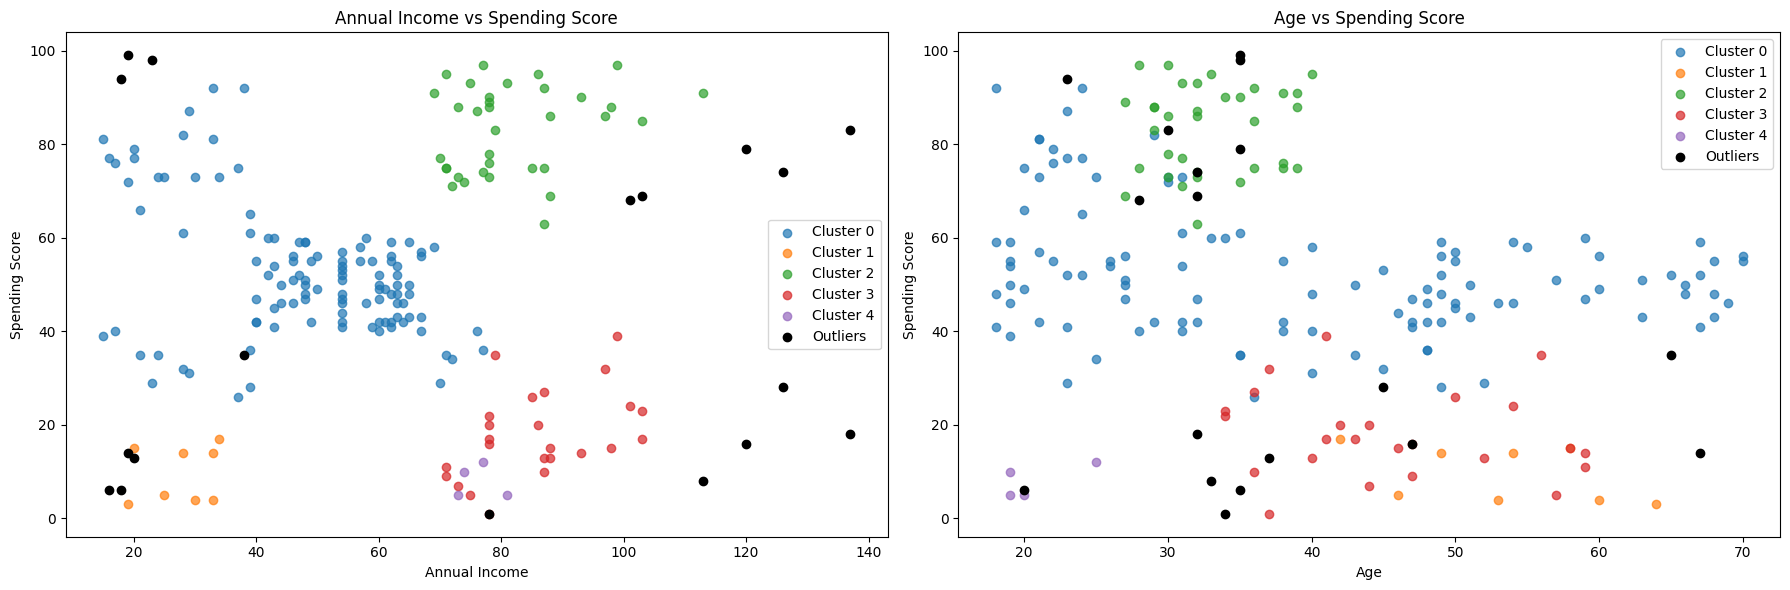

In [37]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
for cluster in x['Cluster'].unique():
    plt.scatter(x[x['Cluster'] == cluster]['Annual Income (k$)'],
                x[x['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)
plt.scatter(outliers['Annual Income (k$)'],outliers['Spending Score (1-100)'],c='black',label='Outliers')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()


plt.subplot(1,2,2)
for cluster in x['Cluster'].unique():
    plt.scatter(x[x['Cluster'] == cluster]['Age'],
                x[x['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.scatter(outliers['Age'],outliers['Spending Score (1-100)'],c='black',label='Outliers')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.tight_layout()

plt.show()
    
    
    